In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# General Exploation 

In [4]:
# loading the data
train_csv = pd.read_csv('../data/stud.csv')
print(train_csv.head())

   gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [6]:
# getting the shape of the data
print(train_csv.shape)

(1000, 8)


In [5]:
# getting a summary of the data
train_csv.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
# checking for missing values
train_csv.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [8]:
train_csv.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [9]:
# checking the data types 
train_csv.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [11]:
# Check for duplocates
train_csv.duplicated().sum() 

0

In [13]:
    # check Null and dtypes
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [14]:
# getting the unique values of the data
train_csv.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

# Exploring more about the data

In [15]:
train_csv.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [17]:
# Feature Engineering : Adding Total score and Average score
train_csv['total_score'] = train_csv['math_score'] + train_csv['reading_score'] + train_csv['writing_score']
train_csv['average_score'] = train_csv['total_score'] / 3
train_csv.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [19]:
# Some insights on highest scores
reading_full = train_csv[train_csv['reading_score'] == 100].count()[0]
writing_full = train_csv[train_csv['writing_score'] == 100].count()[0]
math_full = train_csv[train_csv['math_score'] == 100].count()[0]
print(f"Number of students who scored 100 in reading: {reading_full}")
print(f"Number of students who scored 100 in writing: {writing_full}")
print(f"Number of students who scored 100 in math: {math_full}")

Number of students who scored 100 in reading: 17
Number of students who scored 100 in writing: 14
Number of students who scored 100 in math: 7


In [20]:
# Some insights on lowest scores
reading_zero = train_csv[train_csv['reading_score'] <=  20].count()[0]
writing_zero = train_csv[train_csv['writing_score'] <= 20].count()[0]
math_zero = train_csv[train_csv['math_score'] <= 20].count()[0]
print(f"Number of students who scored less than 20 in reading: {reading_zero}")
print(f"Number of students who scored less than 20 in writing: {writing_zero}")
print(f"Number of students who scored less than 20 in math: {math_zero}")

Number of students who scored less than 20 in reading: 1
Number of students who scored less than 20 in writing: 3
Number of students who scored less than 20 in math: 4


### Insights
The worst performance have been in maths.

The best performance have been in reading.

# Visualizing the Data

### Histogram and KDE (Kernel Distribution Function)

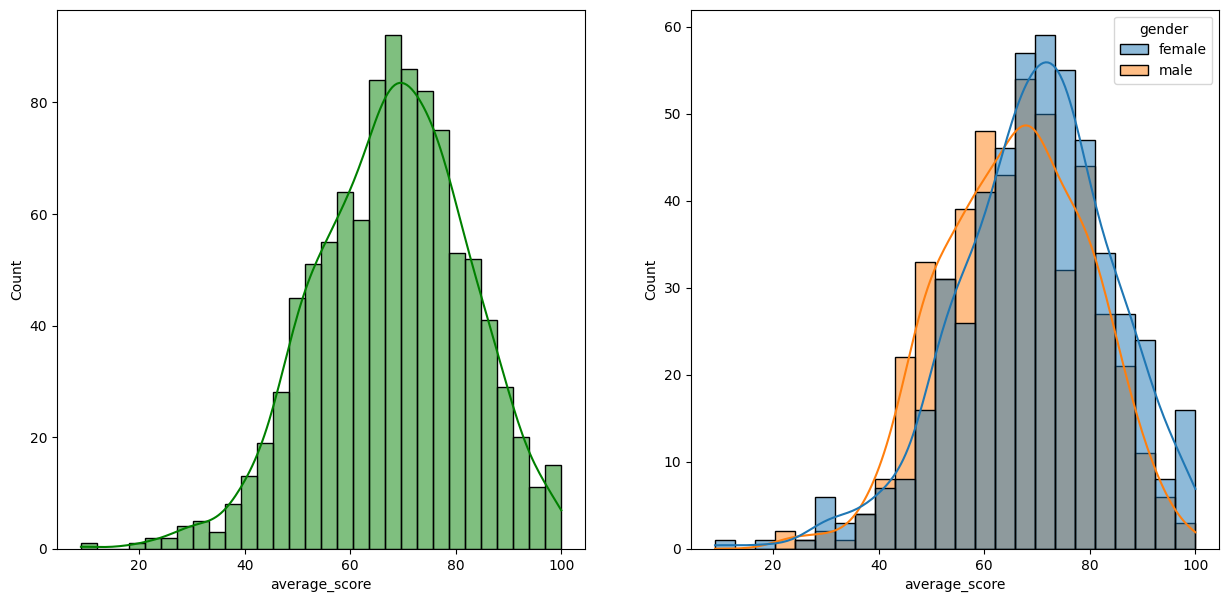

In [22]:
# plotting the distribution of the average score with respect to gender
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=train_csv,x='average_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=train_csv,x='average_score',kde=True,hue='gender')
plt.show()

Insight : Female tends to perform better

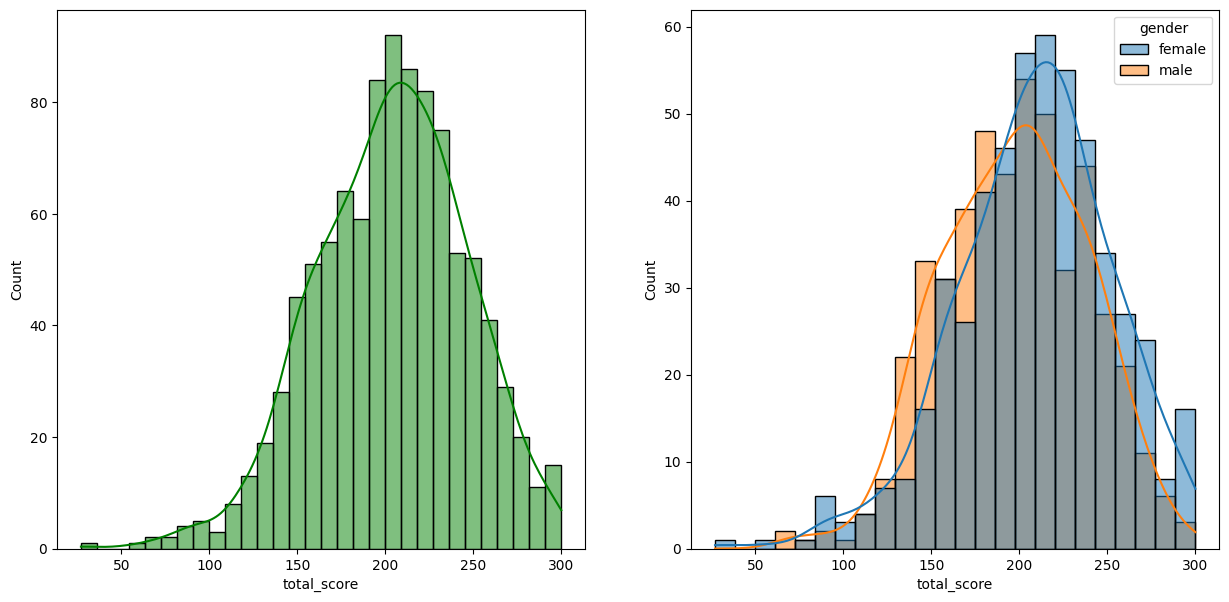

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=train_csv,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=train_csv,x='total_score',kde=True,hue='gender')
plt.show()

Insight : With respect total score as well female tends to perform better

C:\Users\AB\AppData\Local\Temp\ipykernel_23920\1189216358.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\AB\AppData\Local\Temp\ipykernel_23920\1189216358.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\AB\AppData\Local\Temp\ipykernel_23920\1189216358.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


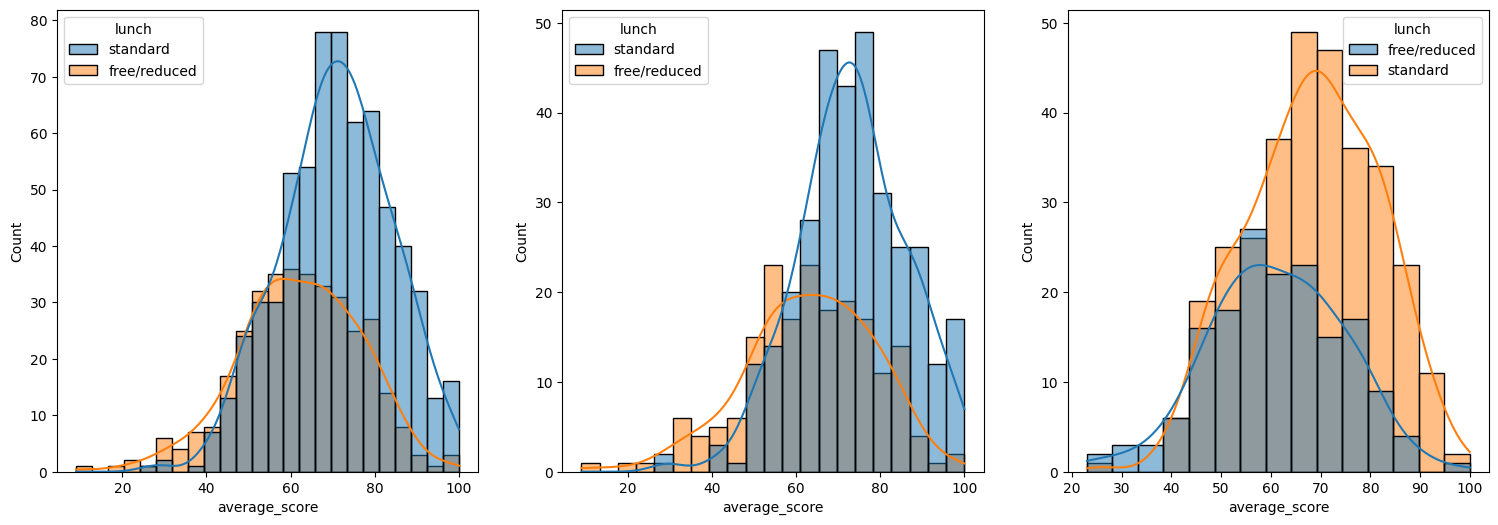

In [24]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=train_csv,x='average_score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=train_csv[train_csv.gender=='female'],x='average_score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=train_csv[train_csv.gender=='male'],x='average_score',kde=True,hue='lunch')
plt.show()

Insight : In general we can see that standard lunch helps to have a better score

C:\Users\AB\AppData\Local\Temp\ipykernel_23920\2731448570.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\AB\AppData\Local\Temp\ipykernel_23920\2731448570.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\AB\AppData\Local\Temp\ipykernel_23920\2731448570.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


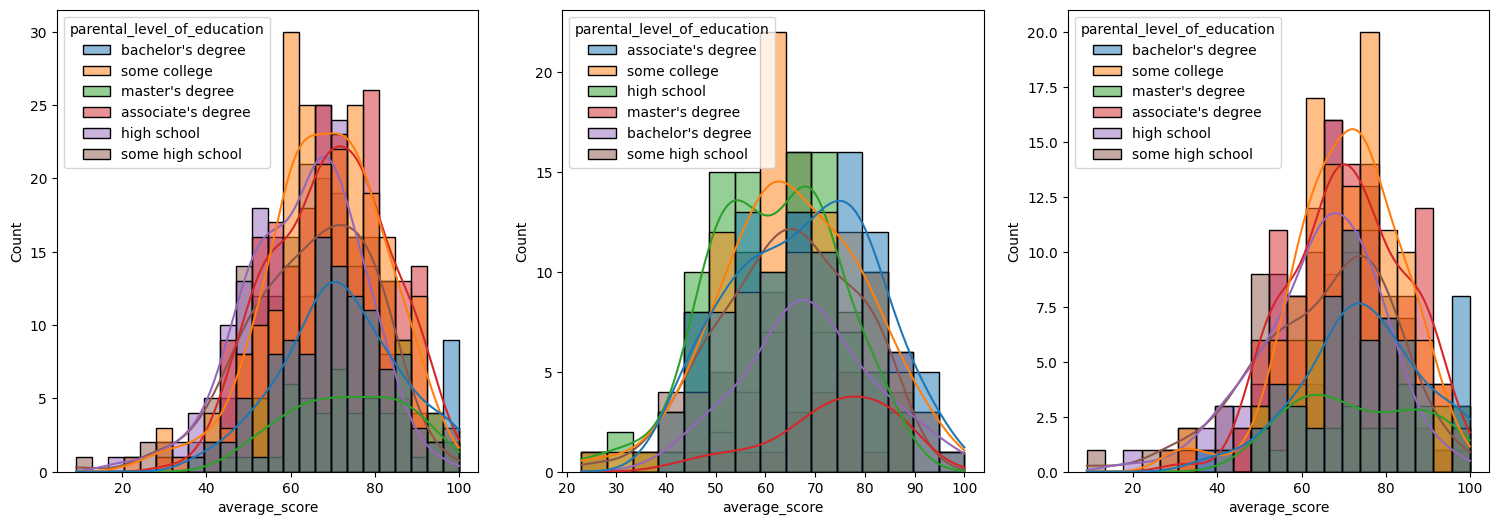

In [27]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=train_csv,x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=train_csv[train_csv.gender=='male'],x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=train_csv[train_csv.gender=='female'],x='average_score',kde=True,hue='parental_level_of_education')
plt.show()

Insight : 
Parental Education Impact:

    Across all three graphs, higher parental education is associated with better average scores.
    This trend is slightly more evident for females than for males.

Gender Differences:

    Males and females show similar trends, but females with higher parental education levels tend to outperform males in similar groups.

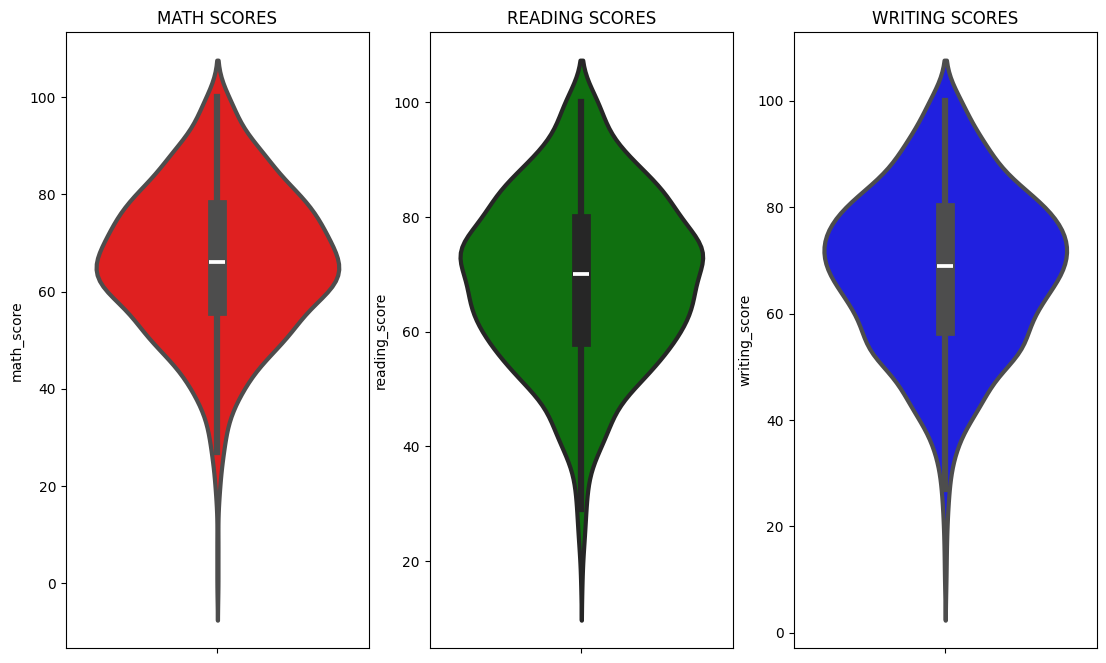

In [30]:
# maximun score in each subject
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=train_csv,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=train_csv,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=train_csv,color='blue',linewidth=3)
plt.show()

Insight : From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

### Multivariate analysis using pie plot

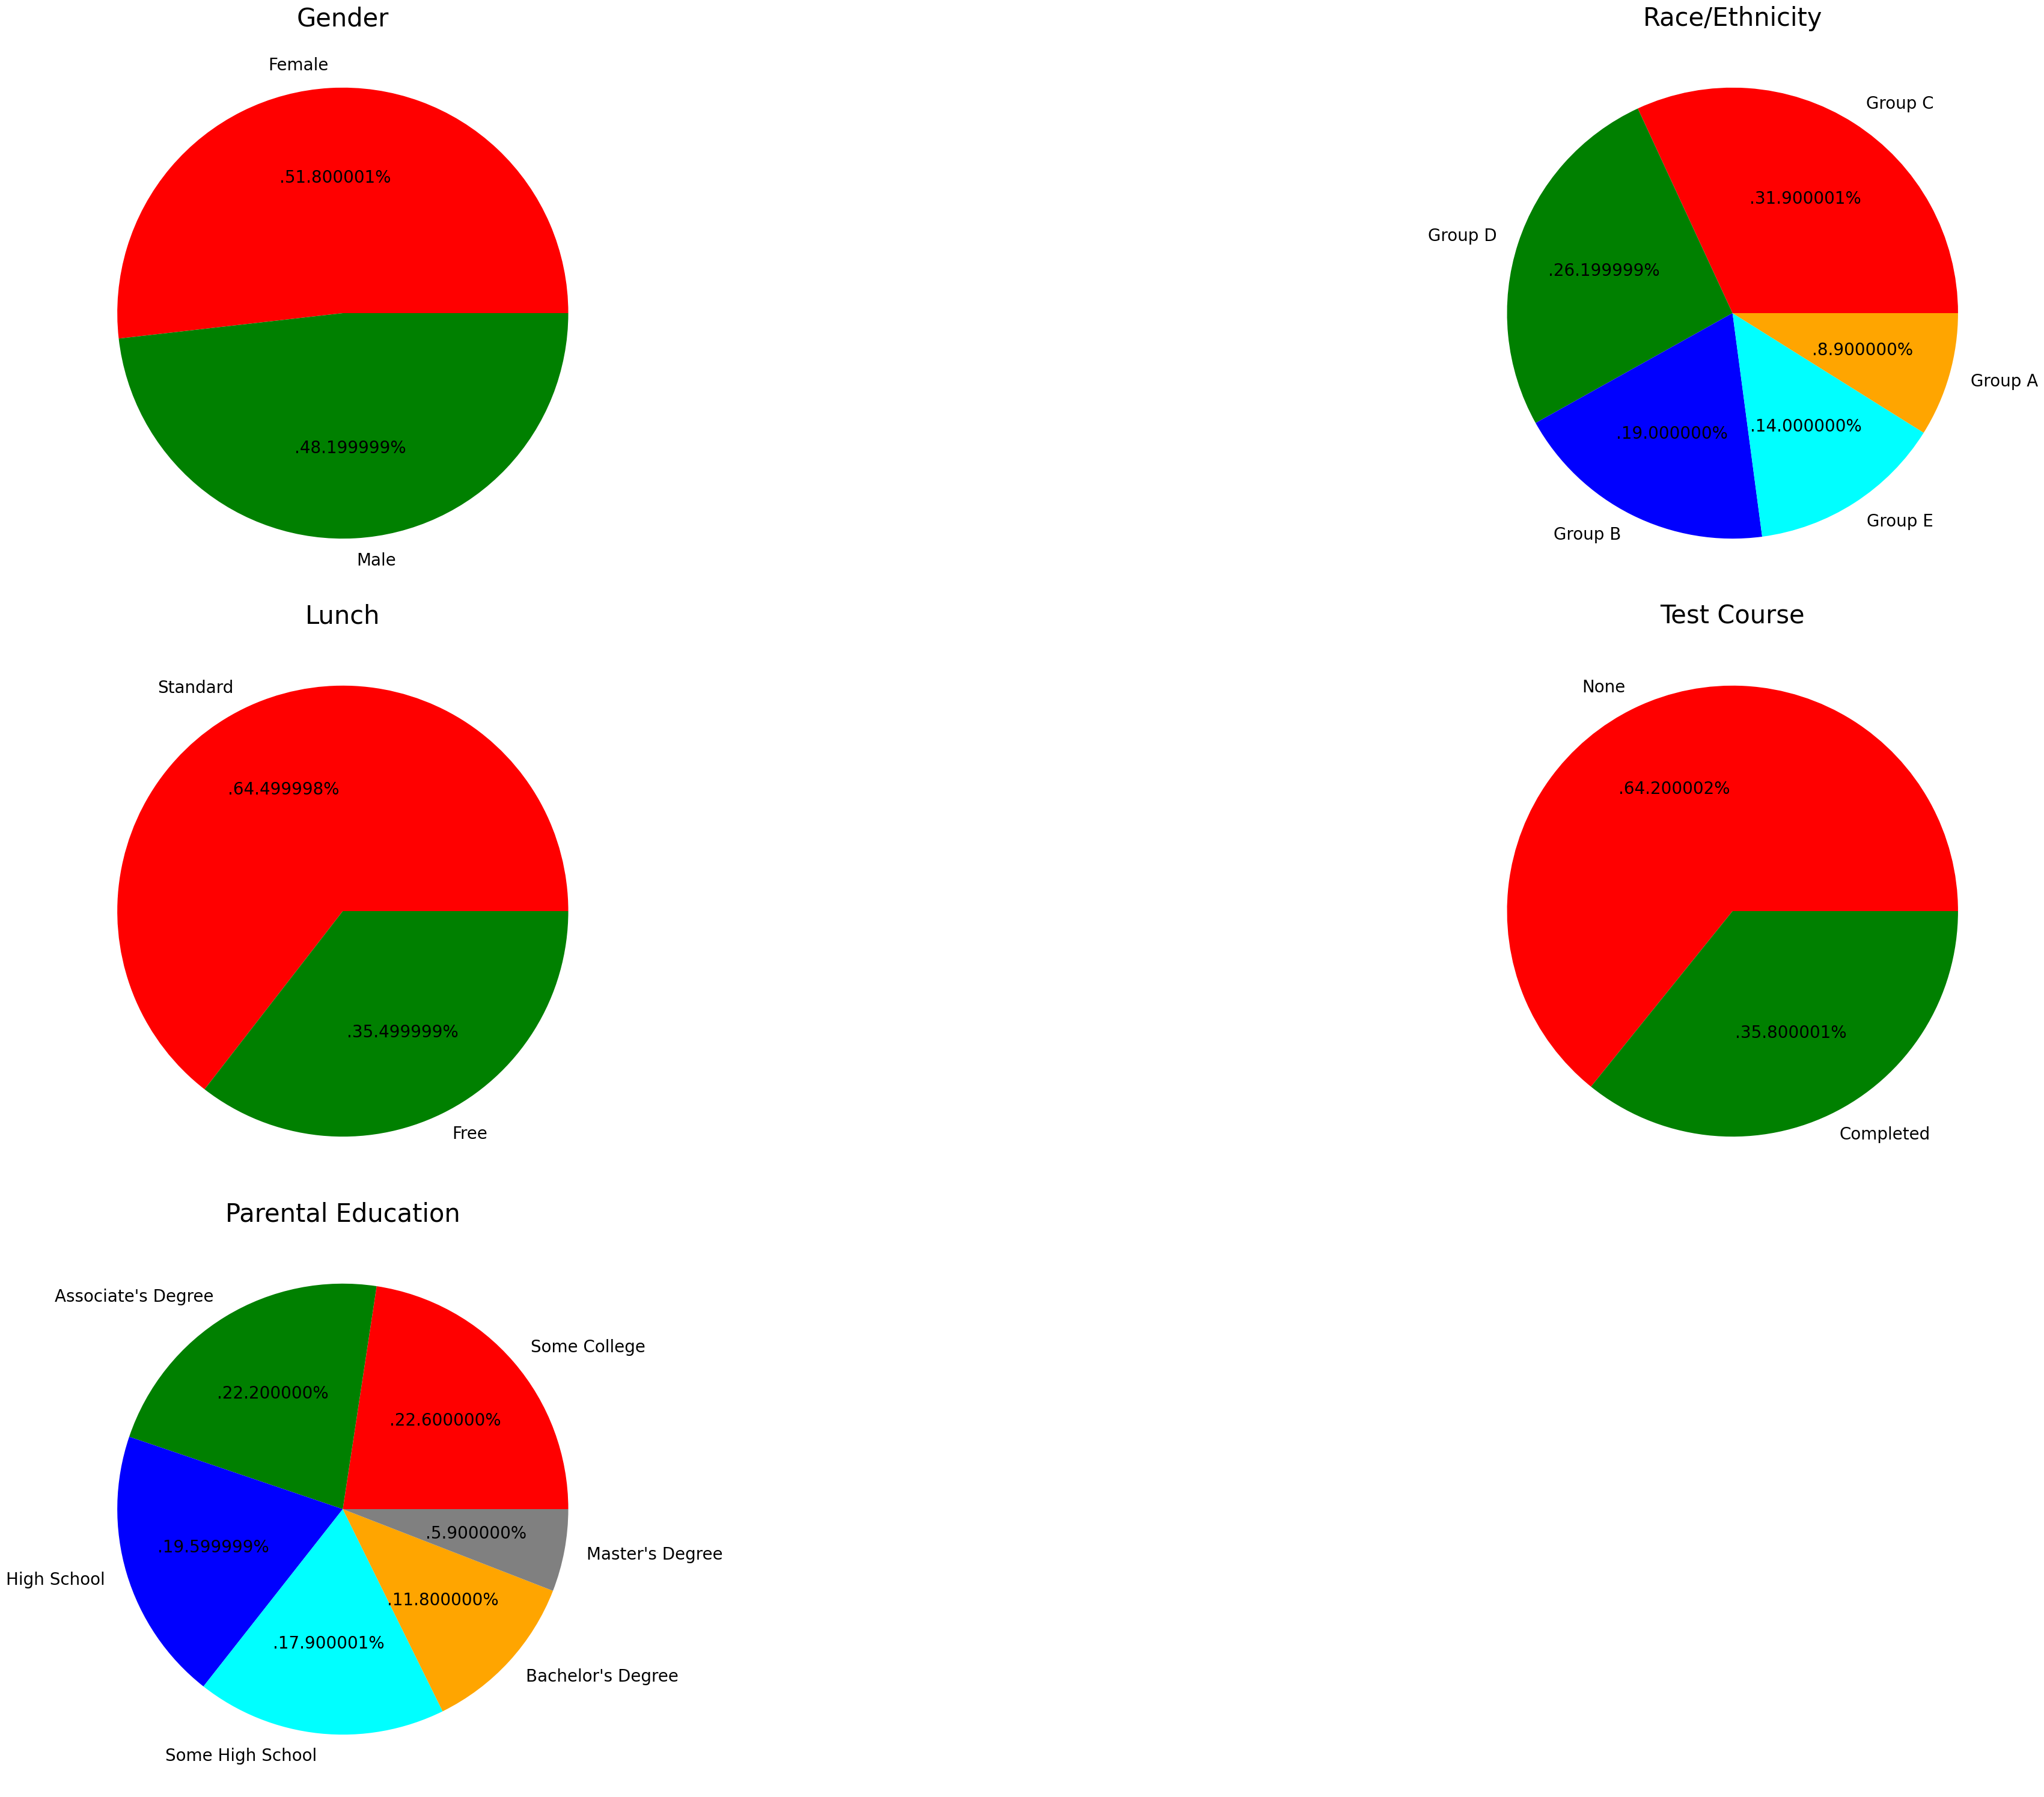

In [41]:
plt.rcParams['figure.figsize'] = (50, 30)

plt.subplot(3, 2, 1)
size = train_csv['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%', textprops={'fontsize': 20})
plt.title('Gender', fontsize = 30)
plt.axis('off')



plt.subplot(3, 2, 2)
size = train_csv['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%', textprops={'fontsize': 20})
plt.title('Race/Ethnicity', fontsize = 30)
plt.axis('off')



plt.subplot(3, 2, 3)
size = train_csv['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%', textprops={'fontsize': 20})
plt.title('Lunch', fontsize = 30)
plt.axis('off')


plt.subplot(3, 2, 4)
size = train_csv['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%', textprops={'fontsize': 20})
plt.title('Test Course', fontsize = 30)
plt.axis('off')


plt.subplot(3, 2, 5)
size = train_csv['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%', textprops={'fontsize': 20})
plt.title('Parental Education', fontsize = 30)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

Insights:

* Distribution of male and female is quite uniform.
* People with standard lunch are significantly larger than free lunch.
* Most of the students have not completed the test course.

### Bivariate Analysis

How Gender has an impact on individual scores

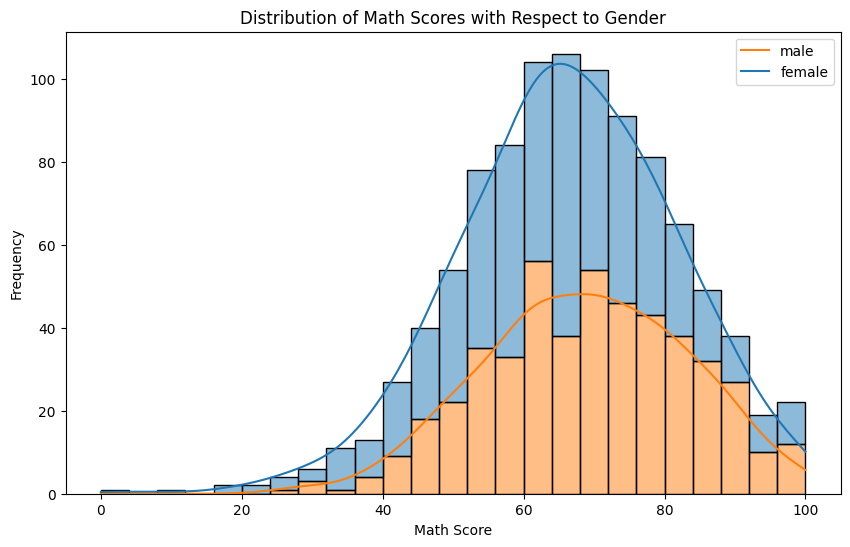

In [46]:
# Plot the distribution of math scores with respect to gender
plt.figure(figsize=(10, 6))
sns.histplot(data=train_csv, x='math_score', hue='gender', multiple='stack', kde=True)
plt.title('Distribution of Math Scores with Respect to Gender')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.legend(labels=['male', 'female'])
plt.show()